In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import argparse

In [2]:
log_path_impala = f"/home/kumquat/Documents/Linfan/social-agents-JAX/results/PopArtIMPALA_1_meltingpot_coop_mining_2025-03-17_14:26:51.204572,./results/PopArtIMPALA_1_meltingpot_coop_mining_2025-03-17_14:26:51.204572,./results/PopArtIMPALA_1_meltingpot_coop_mining_2025-03-14_14:39:21.229188,./results/PopArtIMPALA_1_meltingpot_coop_mining_2025-03-14_14:39:21.229188,./results/PopArtIMPALA_1_meltingpot_coop_mining_2025-03-17_14:26:51.204572,./results/PopArtIMPALA_1_meltingpot_coop_mining_2025-03-17_14:26:51.204572/csv_logs/meltingpot_coop_mining.csv" 
log_path_attn = f"/home/kumquat/Documents/Linfan/social-agents-JAX/results/PopArtIMPALA_attention_1_meltingpot_coop_mining_2025-09-04_01:34:46.303068,./results/PopArtIMPALA_attention_1_meltingpot_coop_mining_2025-06-10_21:32:15.740274,./results/PopArtIMPALA_attention_1_meltingpot_coop_mining_2025-05-28_00:34:00.259639,./results/PopArtIMPALA_attention_1_meltingpot_coop_mining_2025-05-28_00:34:00.259639,./results/PopArtIMPALA_attention_1_meltingpot_coop_mining_2025-05-28_00:34:00.259639,./results/PopArtIMPALA_attention_1_meltingpot_coop_mining_2025-06-10_21:32:15.740274/csv_logs/meltingpot_coop_mining.csv" 

In [3]:
def plot_metrics(log_path,num_ag):
    df = pd.read_csv(log_path)
    agents = range(num_ag)
    metrics = ["episode_return", "extract_gold", "mine_gold", "mine_iron"]

    fig, axes = plt.subplots(1, len(metrics), figsize=(20, 6), sharey=False)

    for idx, metric in enumerate(metrics):
        y_mean = []
        y_ste = []
        for agent_idx in agents:
            col = f"{metric}_{agent_idx+1}" if metric != "episode_return" else f"agent_{agent_idx}/{metric}"
            Y = pd.to_numeric(df[col], errors='coerce').dropna()
            y_mean.append(Y.mean())
            y_ste.append(Y.std() / np.sqrt(len(Y)))

        x = np.arange(len(agents))
        axes[idx].bar(x, y_mean, yerr=y_ste, capsize=6, alpha=0.7)
        axes[idx].set_xticks(x)
        axes[idx].set_xticklabels([f"Agent {i}" for i in agents])
        axes[idx].set_title(metric.replace("_", " ").title())
        axes[idx].grid(axis='y', linestyle='--', alpha=0.6)

    fig.suptitle("Agent Metrics: Mean with Standard Error", fontsize=16)
    plt.tight_layout()
    plt.show()

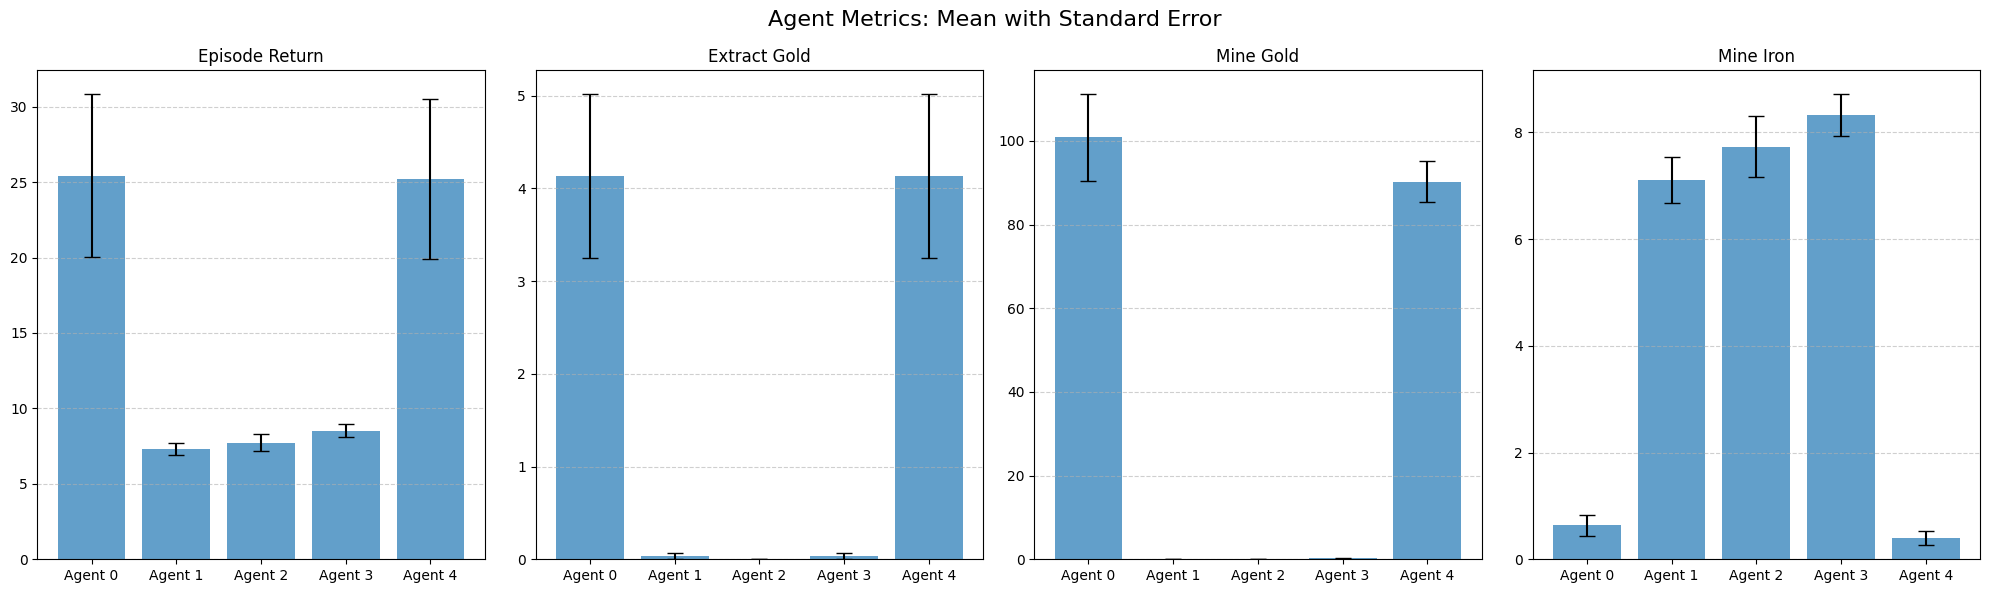

In [4]:
plot_metrics(log_path_impala,5)

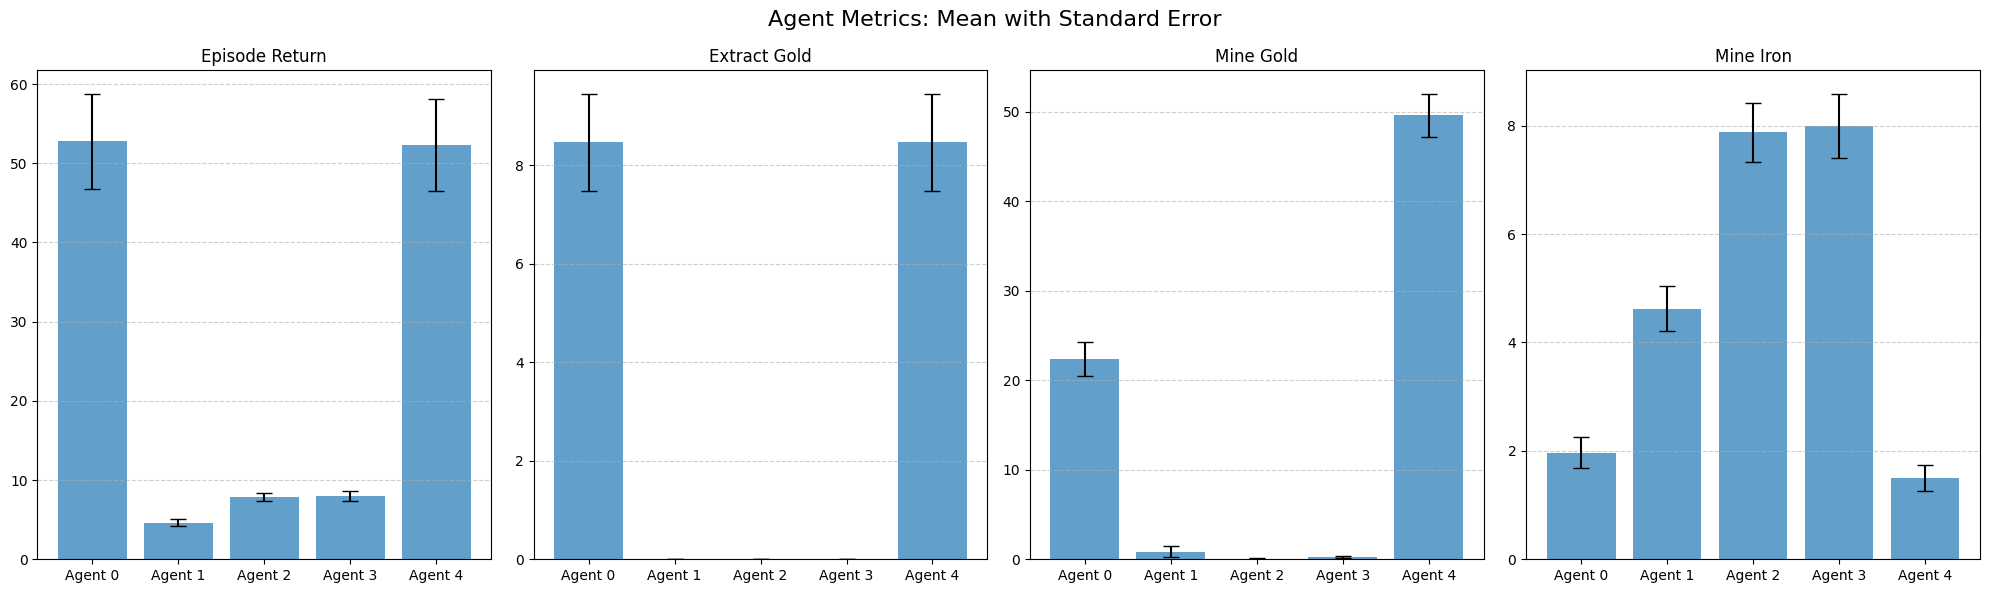

In [5]:
plot_metrics(log_path_attn,5)